<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Actividad 4</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }
        header {
            background-color: green;
            color: #fff;
            text-align: center;
            padding: 20px 0;
        }
        main {
            max-width: 800px;
            margin: 20px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            margin: 0;
        }
        h2 {
            margin: 0;
            text-align: center;
        }
        h3 {
            margin: 0;
            text-align: center;
        }
        section {
            margin-bottom: 20px;
        }
        footer {
            text-align: center;
            padding: 10px 0;
            background-color: #007bff;
            color: #fff;
            position: fixed;
            bottom: 0;
            left: 0;
            width: 100%;
        }
    </style>
</head>
<body>
    <header>
        <h1>Tarea 1</h1>
    </header>
    <main>
        <section>
            <h2>Universidad Externado de Colombia</h2>
            <h3>Ciencia de Datos</h3>
            <h3>Métodos Numéricos</h3>
        </section>
    </main>
    <footer>
        <p>2024 Universidad Externado de Colombia - Ciencia de Datos</p>
    </footer>
</body>
</html>

#### Librerías necesarias

In [312]:
from sympy import Matrix
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from pylab import *
import math
from sympy import symbols, exp, log

#### Funciones necesarias

In [367]:
#Función para truncar
def truncar4(x, decimales): return int(x * (10**decimales)) / (10**decimales) if decimales > 0 else x
tr4 = np.vectorize(truncar4) #Para que se aplique a numpy

In [410]:
def eliminacion_gauss(matrizA, solucion, normalizar = False,decimales = 4):
    """
    Este código realiza la eliminación gaussiana y tiene dos enfoque el primero es generar la matriz U y ocurre cuando
    no se normalizan las filas. El segundo enfoque es solucionar sistemas de ecuaciones y ahí se puede optar por nomalizar
    para ambos caos se pueden truncar los valores que acompañan la matriz.

    Parámetros:
    - matrizA (arreglo de numpy): Matriz cuadrada de coeficientes del sistema o matriz
    
    - solucion (arreglo de numpy): Matriz de las soluciones del sistema si es el caso. Cuando está vació no sé hará solución de sistema
                                    Sino que se hará la matriz U
    
    - normalizar (bool, defecto = False): Cuando este valor es Falso se genera la matriz U, si es verdadero se vuelve unitaria.

    - decimales (int, defecto = 4): este se usa para truncar al número de dígitos escogidos todas las cuentas del sistema o matriz.
    """

    tamaño = len(matrizA)
    sistemaCompleto = np.hstack([matrizA, solucion.reshape(-1, 1)]) if len(solucion) > 0 else matrizA
    solucionSis = np.zeros(tamaño)
    conteo = 0
    for i in range(tamaño):
        if normalizar == True:
            sistemaCompleto[i] = tr4(sistemaCompleto[i] / sistemaCompleto[i, i], decimales)
        for j in range(1+i, tamaño):
            conteo += 1
            if sistemaCompleto[i, i] == 0: print("error hay lugar en la diagonal que da 0")
            factor = tr4(sistemaCompleto[j, i] / sistemaCompleto[i, i], decimales)
            sistemaCompleto[j, i:] -= tr4(factor * sistemaCompleto[i, i:], decimales)
    
    if len(solucion) > 0:
        for i in range(tamaño):
            sistemaCompleto[i] = tr4(sistemaCompleto[i], decimales)
        for i in reversed(range(tamaño)):
            sumaFila = tr4(np.sum(sistemaCompleto[i, i+1:tamaño] * solucionSis[i+1:tamaño]), decimales)
            solucionSis[i] = tr4(sistemaCompleto[i, tamaño] - sumaFila, decimales)
        
        return solucionSis, sistemaCompleto

    return sistemaCompleto, conteo

#### Parte 1 - punto 4

In [378]:
A = np.array([
    [4, 0, 0, 0, 2],
    [-1, 2, 0, -2, 1],
    [2, 3, 0, 0, 0],
    [11, 8, -4, 6, -2],
    [1, 1, 4, 3, -2]
])

A = np.array([[-1.,  2.,  0., -2.,  1.],
       [11.,  8., -4.,  6., -2.],
       [ 1.,  1.,  4.,  3., -2.],
       [ 4.,  0.,  0.,  0.,  2.],
       [ 2.,  3.,  0.,  0.,  0.]])
eliminacion_gauss(A.astype(float), [], decimales = 0)

(array([[ -1.        ,   2.        ,   0.        ,  -2.        ,
           1.        ],
        [  0.        ,  30.        ,  -4.        , -16.        ,
           9.        ],
        [  0.        ,   0.        ,   4.4       ,   2.6       ,
          -1.9       ],
        [  0.        ,   0.        ,   0.        ,  -4.36363636,
           4.06060606],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          -0.45833333]]),
 10)

In [379]:
A = np.array([
    [4, 0, 0, 0, 2],
    [-1, 2, 0, -2, 1],
    [2, 3, 0, 0, 0],
    [11, 8, -4, 6, -2],
    [1, 1, 4, 3, -2]
])

P, no, no2 = lu(A)
PA = np.dot(P,A)

U = eliminacion_gauss(PA.astype(float), [], decimales = 0)
print("como U se obtiene a partir de Gauss")
print(U[0])
print("Se puede calcular su determinante multiplicando la diagonal: ", np.prod(np.diag(U[0])))
print("Como la matriz P tuvo 10 intercambios de fila al ser un número par se mantiene el producto de la diagonal como determinante")
print(P)

como U se obtiene a partir de Gauss
[[ -1.           2.           0.          -2.           1.        ]
 [  0.          30.          -4.         -16.           9.        ]
 [  0.           0.           4.4          2.6         -1.9       ]
 [  0.           0.           0.          -4.36363636   4.06060606]
 [  0.           0.           0.           0.          -0.45833333]]
Se puede calcular su determinante multiplicando la diagonal:  -264.0000000000001
Como la matriz P tuvo 10 intercambios de fila al ser un número par se mantiene el producto de la diagonal como determinante
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


### Punto 1 - el de la triangular

In [281]:
tridiagonal = np.array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

P, L, U = lu(tridiagonal)

# Como se pide en la matriz U sea superior unitaria para que siga la regla de Crout esta se debe transformar

print("La matriz L")
print(L)
print("La matriz U")
print(U)

La matriz L
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.75        1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.8         1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.83333333  1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.85714286
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.875       1.          0.          0.        ]
 [ 0.          0.          0.          0.   

In [282]:
# Se toma la diagonal de U
diagonal_U = np.diag(U)

U_nueva = U / diagonal_U.reshape(-1, 1)
L_nueva = L * diagonal_U

print("L transformada")
print(L)
print("U transformada para Crout")
print(U)

L transformada
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.75        1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.8         1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.83333333  1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.85714286
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.875       1.          0.          0.        ]
 [ 0.          0.          0.          0.

In [283]:
print("Comprobación de que sigue igual el producto")
np.dot(L_nueva, U_nueva)


Comprobación de que sigue igual el producto


array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

In [287]:
print("Esta es la solución real del sistema")
b = np.array([1,0,0,0,0,0,0,0,0,1])
np.linalg.solve(tridiagonal,b )

Esta es la solución real del sistema


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [289]:
print("Ly = b")
y = np.linalg.solve(L_nueva,b )
y

Ly = b


array([0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
       0.14285714, 0.125     , 0.11111111, 0.1       , 1.        ])

In [292]:
print("Ux = y")
x = np.linalg.solve(U_nueva,y )
print("Se cumple la solución del sistema")
x

Ux = y
Se cumple la solución del sistema


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Parte 1 - Punto Fijo

In [503]:
print("Parte de este código lo hicimos con Danna en clase")
def metodo_newton_raphson(fx, p0, tolerance=10**(-5)):
    diff = fx.diff(x)
    delta = float(fx.subs(x,p0)/diff.subs(x,p0))
    iterador =  0
    tiempo = dict()
    valores = dict()
    valores[iterador] = p0
    while abs(delta) > tolerance:
        inicio = time.time()
        p0 = p0 - delta
        delta =  float(fx.subs(x,p0)/diff.subs(x,p0))
        iterador += 1
        print(f"iteración {iterador}: p={p0}")
        valores[iterador] = p0
        final = time.time()
        tiempo[iterador] = final-inicio
    return p0, tiempo, valores

Parte de este código lo hicimos con Danna en clase


In [436]:
def aitken(newton, tolerancia =10**(-5)):
    pn = newton.copy()
    i = 0
    pInicial, pLuego = 0, 1000
    while abs(pInicial - pLuego) > tolerancia:
        pInicial = pn[i] - (((pn[i+1] - pn[i])**2)/(pn[i+2] - 2*pn[i+1] + pn[i]))
        print(i, pInicial)
        i += 1
        pLuego = pn[i] - (((pn[i+1] - pn[i])**2)/(pn[i+2] - 2*pn[i+1] + pn[i]))
    return pLuego, i
    

$f(x) = e^{6x} + 3(\ln 2)^2e^{2x} - \ln 8 \cdot e^{4x} - (\ln 2)^3$

In [437]:
x = symbols('x')
funcion = exp(6*x) + 3*(log(2))**2*exp(2*x) - log(8)*exp(4*x) - (log(2))**3

resultadosNewton = metodo_newton_raphson(funcion,0,tolerance=3 *(10**(-5)))
resultadosNewton[0]

iteración 1: p=-0.05114213657334245
iteración 2: p=-0.08984247581502666
iteración 3: p=-0.1182447360258235
iteración 4: p=-0.13856559584000833
iteración 5: p=-0.15281619296929538
iteración 6: p=-0.16266025259027356
iteración 7: p=-0.16938617562234737
iteración 8: p=-0.17394606447458652
iteración 9: p=-0.17702081377065793
iteración 10: p=-0.1790864552276591
iteración 11: p=-0.18047067667989156
iteración 12: p=-0.18139668914881588
iteración 13: p=-0.1820154613800404
iteración 14: p=-0.1824286147573202
iteración 15: p=-0.18270433494121108
iteración 16: p=-0.182888275193836
iteración 17: p=-0.18301095840919507
iteración 18: p=-0.18309277216650258
iteración 19: p=-0.18314732552052906
iteración 20: p=-0.1831836998202307


-0.1831836998202307

In [352]:
aitken(resultadosNewton[2],tolerancia=3 *(10**(-5)))

0 -0.21022028116719185
1 -0.19657860612550765
2 -0.1896628467274744
3 -0.18627100853213532
4 -0.18465155747276912
5 -0.18389421250384796
6 -0.18354544500992143
7 -0.18338660154759043
8 -0.1833148186033844
9 -0.1832825533718166


(-0.183268103991913, 10)

#### Punto 3

In [411]:
def errores(real, prediccion):
    absoluto = abs(real - prediccion)
    relativo = (absoluto / real)
    return absoluto, relativo

In [419]:
tr = truncar_a_cuatro = lambda x: int(x * 10000) / 10000
A = np.array([
    [tr(np.pi), tr(-np.e), tr(np.sqrt(2)), tr(-np.sqrt(3))],
    [tr(np.pi**2), tr(np.e), tr(-np.e**2), tr(3/7)],
    [tr(np.sqrt(5)), tr(-np.sqrt(6)), 1, tr(-np.sqrt(2))],
    [tr(np.pi**3), tr(np.e**2), tr(np.sqrt(7)), tr(1/9)]
], dtype=float)

b = np.array([
    tr(np.sqrt(11)),
    0,
    tr(np.pi),
    tr(np.sqrt(2))
], dtype=float)

A2 = np.array([
    [(np.pi), (-np.e), (np.sqrt(2)), (-np.sqrt(3))],
    [(np.pi**2), (np.e), (-np.e**2), (3/7)],
    [(np.sqrt(5)), (-np.sqrt(6)), 1, (-np.sqrt(2))],
    [(np.pi**3), (np.e**2), (np.sqrt(7)), (1/9)]
], dtype=float)

b2 = np.array([
    (np.sqrt(11)),
    0,
    (np.pi),
    (np.sqrt(2))
], dtype=float)
eliminacion_gauss(A, b, normalizar = True,decimales = 4)[0]


array([ 0.7423, -3.032 ,  0.1246,  4.2916])

In [421]:
prediccionn = eliminacion_gauss(A, b,normalizar=True, decimales=4)[0]
reall = eliminacion_gauss(A2, b2, normalizar = True, decimales=0)[0]

print(f"""La solución con el valor truncado es {prediccionn}""")
print(f"""La solución real es {reall}""")

print(f"""los errores absolutos son {[errores(reall[i], prediccionn[i])[0] for i in range(4)]}""")
print(f"""los errores relativos son {[errores(reall[i], prediccionn[i])[1] for i in range(4)]}""")

La solución con el valor truncado es [ 0.7423 -3.032   0.1246  4.2916]
La solución real es [ 0.74158627 -3.02957532  0.1246506   4.28662904]
los errores absolutos son [0.00071373297146482, 0.0024246770795981476, 5.059902067387767e-05, 0.004970957921676344]
los errores relativos son [0.0009624409231911472, -0.0008003356316161322, 0.0004059268152051607, 0.001159642663939549]


In [423]:
A = np.array([
    [tr(np.pi),tr( np.sqrt(2)), -1, 1],
    [tr(np.e), -1, 1, 2],
    [1, 1, tr(-np.sqrt(3)), 1],
    [-1, -1, 1, tr(-np.sqrt(5))]
], dtype=float)

b = np.array([
    0,
    1,
    2,
    3
], dtype=float)

A2 = np.array([
    [(np.pi),( np.sqrt(2)), -1, 1],
    [(np.e), -1, 1, 2],
    [1, 1, (-np.sqrt(3)), 1],
    [-1, -1, 1, (-np.sqrt(5))]
], dtype=float)

b = np.array([
    0,
    1,
    2,
    3
], dtype=float)

In [424]:
prediccionn = eliminacion_gauss(A, b,normalizar=True, decimales=4)[0]
reall = eliminacion_gauss(A2, b2, normalizar = True, decimales=0)[0]

print(f"""La solución con el valor truncado es {prediccionn}""")
print(f"""La solución real es {reall}""")

print(f"""los errores absolutos son {[errores(reall[i], prediccionn[i])[0] for i in range(4)]}""")
print(f"""los errores relativos son {[errores(reall[i], prediccionn[i])[1] for i in range(4)]}""")

La solución con el valor truncado es [ 1.3489 -4.6773 -4.0324 -1.6564]
La solución real es [ 1.63685112 -2.32547356 -3.23364647 -1.77062488]
los errores absolutos son [0.2879511195426172, 2.3518264365884365, 0.7987535338164262, 0.11422487568676543]
los errores relativos son [0.17591772159649985, -1.0113322609173043, -0.24701325335639862, -0.06451105327573209]


### Punto B

In [502]:
matrices = []
for i in range(1,81):
    fila = []
    for j in range(1,81):
        if i == j: fila += [2*i]
        elif (i+2 == j) or (i-2 == j) : fila += [0.5*i]
        elif (i+4 == j) or (i-4 == j): fila += [0.25*i]
        else: fila += [0]
    matrices += [fila]

In [462]:
def siediel(matrizA, vectorSolución, tolerancia):
   tamaño=len(vectorSolución)
   solucionFinal=zeros(len(vectorSolución))
   parcial=solucionFinal.copy()
   error=1
   iteración=0
   while error>tolerancia:
      iteración+=1
      for i in range(tamaño):
         sum1=0
         for j in range(tamaño):
            if i!=j: sum1+=matrizA[i,j]*solucionFinal[j]
         solucionFinal[i]=(-1/matrizA[i,i])*(sum1-vectorSolución[i])
      error = max(abs(solucionFinal-parcial))/max(abs(solucionFinal))
      parcial=solucionFinal.copy()
   return solucionFinal, iteración

def jacobi(matrizA, vectorSolución, tolerancia):
    tamaño = len(vectorSolución)
    solucionFinal = np.zeros(tamaño)  
    parcial = solucionFinal.copy()
    error = 1
    iteracion = 0
    while error > tolerancia:
        iteracion += 1
        parcial = solucionFinal.copy()  
        for i in range(tamaño):
            sum1 = 0
            for j in range(tamaño):
                if i != j:sum1 += matrizA[i, j] * parcial[j]  
            solucionFinal[i] = (-1 / matrizA[i, i]) * (sum1 - vectorSolución[i])  
        error = np.max(np.abs(solucionFinal - parcial)) / np.max(np.abs(solucionFinal))  
    return solucionFinal, iteracion

print("Con siediel es", siediel(np.array(matrices), np.array([np.pi]*80), 1.E-6)[1])
print("Con Jacobi es", jacobi(np.array(matrices), np.array([np.pi]*80), 1.E-6)[1])
print("Los resultados casos ena ambos son similares")
print(siediel(np.array(matrices), np.array([np.pi]*80), 1.E-6)[0])


Con siediel es 10
Con Jacobi es 39
Los resultados casos ena ambos son similares
[1.53873414 0.73142095 0.10796998 0.17328416 0.0405567  0.08524859
 0.16644796 0.12197955 0.10124978 0.0904573  0.0720285  0.07026331
 0.06875486 0.0632437  0.05971143 0.05570893 0.05187474 0.04924594
 0.04677832 0.04448357 0.04246546 0.04053496 0.03876903 0.03717872
 0.035705   0.03434797 0.03309199 0.03191912 0.03082682 0.02980711
 0.02885204 0.02795665 0.02711501 0.0263222  0.02557438 0.02486773
 0.02419898 0.02356521 0.02296371 0.02239209 0.02184818 0.02133002
 0.02083582 0.02036396 0.01991296 0.01948148 0.01906828 0.01867221
 0.01829225 0.01792741 0.01757685 0.0172397  0.01691523 0.01660273
 0.01630149 0.01601103 0.01573075 0.01546008 0.01519876 0.01494593
 0.01470078 0.0144641  0.01423462 0.01401257 0.01380241 0.01359363
 0.01338418 0.01318764 0.01297108 0.01278597 0.01270271 0.01252663
 0.01237654 0.01220963 0.01129008 0.01114102 0.01217313 0.01201746
 0.01542896 0.01523796]


#### punto 4

In [494]:
def gompertz(t, P_L, c, k):
    return P_L * np.exp(-c * np.exp(-k * t))

### Modelo fallido

In [501]:
print("Esta es la que decidí que no sirve, errores en la covarianza")
añosDemo = np.array([1988, 1989, 1990])
poblacionDemo = np.array([31834000, 32494000, 33156000])
añosAjuste = añosDemo - añosDemo.min()
parametroPL = [31180000, 31834000, 32494000]
popt, pcov = curve_fit(gompertz, añosAjuste,parametroPL, poblacionDemo, maxfev=5000)
pcov

Esta es la que decidí que no sirve, errores en la covarianza


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

### Modelo 1

In [485]:
def gompertz(t, P_L, c, k):
    return P_L * np.exp(-c * np.exp(-k * t))

def costoFuncion(params):
    P_L, c, k = params
    predicted = gompertz(año, P_L, c, k)
    return np.sum((predicted - poblacion)**2) 

año = np.array([1988, 1989, 1990]) - 1988  #para que quede de 0 a 1
poblacion = np.array([31834000, 32494000, 33156000])
iniciales = [35000000, 0.1, 0.1]
cotasEstablecidas = [(poblacion.max(), 1.2 * poblacion.max()),(0, 1),  (0, 1)] 

print("El método es L-BFGS-B y el error se minimiza con el error cuadratico")
estimacion = minimize(costoFuncion, iniciales, method='L-BFGS-B', bounds=cotasEstablecidas)

parametrosEstimados = estimacion.x
print(f"""Los parametros estimados son: {round(parametrosEstimados[0], 2)}, c = {round(parametrosEstimados[1], 4)}, k = {round(parametrosEstimados[2], 4)}""")

El método es L-BFGS-B y el error se minimiza con el error cuadratico
Los parametros estimados son: 35444901.91, c = 0.108, k = 0.2342


In [489]:
añosNuevos = {2010:4408600, 2011:4455300, 2012:45002000, 2013:45435000, 2014:45866000, 2015:46314000, 2016:46830000, 2017:47719000, 2018:48258000, 2019:49396000, 2020:50372000, 2021:51049000, 2022:51609000}
prediccion = dict()
for key, value in añosNuevos.items():
    añoEscalado = key - 1988
    prediccionPoblación = gompertz(añoEscalado, 35444901.91, 0.1080, 0.2342)
    prediccion[key] = prediccionPoblación
prediccion

{2010: 35422761.636992745,
 2011: 35427383.30456886,
 2012: 35431040.41168688,
 2013: 35433934.19536336,
 2014: 35436223.934782796,
 2015: 35438035.68960796,
 2016: 35439469.22211197,
 2017: 35440603.47922267,
 2018: 35441500.93320985,
 2019: 35442211.01810257,
 2020: 35442772.84987831,
 2021: 35443217.37948998,
 2022: 35443569.0968517}

Error absoluto


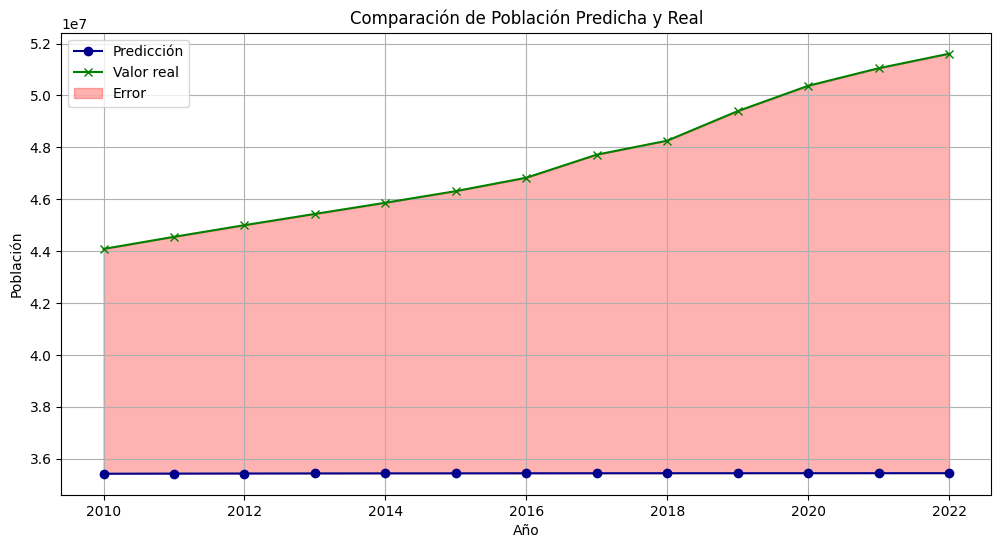

In [490]:
import matplotlib.pyplot as plt

predicciones = prediccion

añosEje = list(predicciones.keys())
valoresPredichos = list(predicciones.values())
valoresReales = list(reales.values())

print("Error absoluto")
errorAboluto = [abs(pred - real) for pred, real in zip(valoresPredichos, valoresReales)] #error absoluto

plt.figure(figsize=(12, 6))
plt.plot(añosEje, valoresPredichos, label='Predicción', marker='o', linestyle='-', color='darkblue')
plt.plot(añosEje, valoresReales, label='Valor real', marker='x', linestyle='-', color='green')
plt.fill_between(añosEje, valoresPredichos, valoresReales, color='red', alpha=0.3, label='Error')
plt.xlabel('Año')
plt.ylabel('Población')
plt.title('Comparación de Población Predicha y Real')
plt.legend()
plt.grid(True)
plt.show()

### Modelo2

In [491]:
def costoFuncion2(params):
    c, k = params
    predicc = gompertz(año, P_L, c, k)
    return np.sum((predicc - poblacion)**2) 

año = np.array([1988, 1989, 1990]) - 1988  #para que quede de 0 a 1
poblacion = np.array([31834000, 32494000, 33156000])

print("Este valor yo lo fijo") 
P_L = 55000000 #Este valor yo lo fijé

iniciales = [0.1, 0.1]

cotasEstablecidas = [(0, 1),  (0, 1)] 

print("El método es L-BFGS-B y el error se minimiza con el error cuadratico")
estimacion = minimize(costoFuncion2, iniciales, method='L-BFGS-B', bounds=cotasEstablecidas)

parametrosEstimados = estimacion.x
print(f"""Los parametros estimados son:  c = {round(parametrosEstimados[0], 4)}, k = {round(parametrosEstimados[1], 4)}""")

Este valor yo lo fijo
El método es L-BFGS-B y el error se minimiza con el error cuadratico
Los parametros estimados son:  c = 0.5469, k = 0.0387


In [492]:
prediccion2 = dict()
for key, value in añosNuevos.items():
    añoEscalado = key - 1988
    prediccionPoblación = gompertz(añoEscalado, 55000000, 0.5469, 0.0387)
    prediccion2[key] = prediccionPoblación
prediccion2

{2010: 43549881.59627726,
 2011: 43937493.06321601,
 2012: 44313646.09577612,
 2013: 44678558.99458608,
 2014: 45032455.27538606,
 2015: 45375562.72800674,
 2016: 45708112.54117566,
 2017: 46030338.49070627,
 2018: 46342476.18852347,
 2019: 46644762.38990858,
 2020: 46937434.35630406,
 2021: 47220729.27100013,
 2022: 47494883.705028236}

Error absoluto


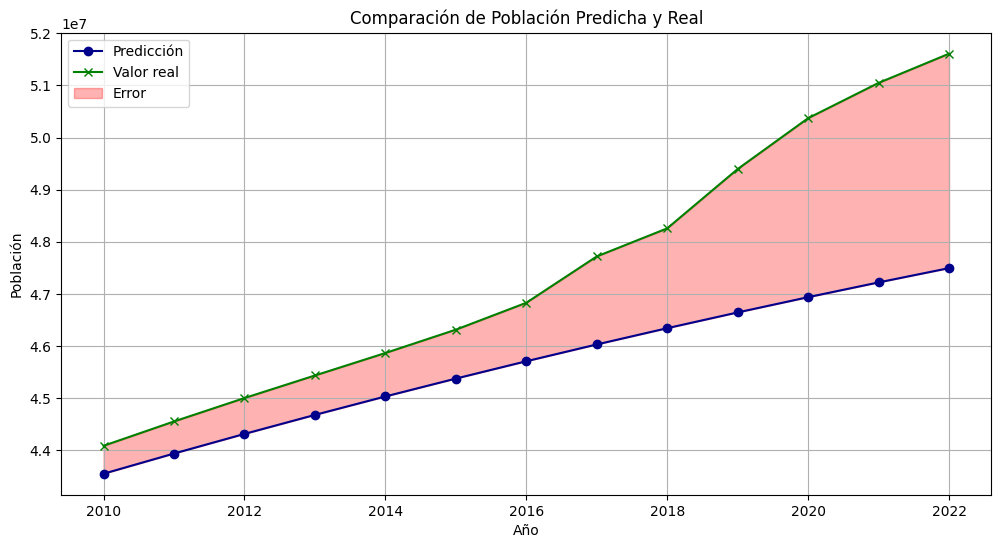

In [493]:
# Datos proporcionados por el usuario
predicciones = prediccion2

añosEje = list(predicciones.keys())
valoresPredichos = list(predicciones.values())
valoresReales = list(reales.values())

print("Error absoluto")
errorAboluto = [abs(pred - real) for pred, real in zip(valoresPredichos, valoresReales)] #error absoluto

plt.figure(figsize=(12, 6))
plt.plot(añosEje, valoresPredichos, label='Predicción', marker='o', linestyle='-', color='darkblue')
plt.plot(añosEje, valoresReales, label='Valor real', marker='x', linestyle='-', color='green')
plt.fill_between(añosEje, valoresPredichos, valoresReales, color='red', alpha=0.3, label='Error')
plt.xlabel('Año')
plt.ylabel('Población')
plt.title('Comparación de Población Predicha y Real')
plt.legend()
plt.grid(True)
plt.show()